# Import and Ingest

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [2]:
df = pd.read_csv('data.csv')
df['time'] = pd.to_datetime(df['time'])
df.set_index('time', inplace = True)
print(df.shape)  # (123, 8)
df.tail()

(1176, 12)


,Bitcoin,Bitcoin Crash,Blockchain,Crisis,Cryptocurrency,Nicehash,Hashing,GPU,GeForce,mining,Tesla,Price
time,,,,,,,,,,,,
2022-06-18 19:00:00,64,34,41,30,66,64,31,77,86,59,62,18311.740234
2022-06-18 20:00:00,78,52,41,30,77,70,40,77,88,58,64,18090.488281
2022-06-18 21:00:00,100,45,40,32,67,67,45,81,90,58,62,18700.638672
2022-06-18 22:00:00,90,27,37,33,55,70,42,84,87,58,65,18719.089844
2022-06-19 00:00:00,66,21,36,33,46,56,32,78,82,64,59,19109.523438


# Visualize the Time Series

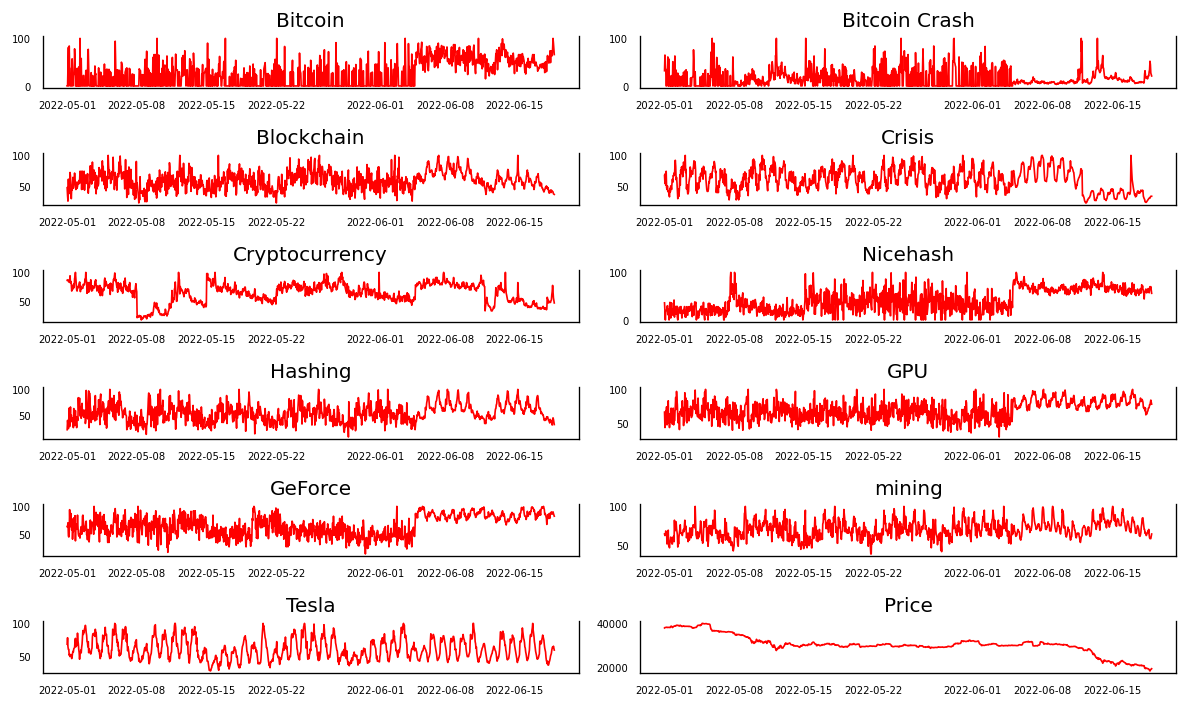

In [3]:
# Plot
fig, axes = plt.subplots(nrows=6, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    data = df[df.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(df.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

# Testing Causation using Granger’s Causality Test

In [4]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(df, variables = df.columns)    

C:\Users\Public\anaconda3\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 8, but rank is 1
  warnings.warn('covariance of constraints does not have full '


,Bitcoin_x,Bitcoin Crash_x,Blockchain_x,Crisis_x,Cryptocurrency_x,Nicehash_x,Hashing_x,GPU_x,GeForce_x,mining_x,Tesla_x,Price_x
Bitcoin_y,1.0000,0.0334,0.0005,0.0066,0.0018,0.0000,0.0004,0.0000,0.0000,0.0059,0.1672,0.0000
Bitcoin Crash_y,0.0320,1.0000,0.0738,0.0000,0.0025,0.0001,0.0374,0.1015,0.4903,0.0091,0.0006,0.0032
Blockchain_y,0.0024,0.0539,1.0000,0.0000,0.0000,0.1610,0.0000,0.0000,0.0000,0.0000,0.0000,0.1077
Crisis_y,0.0880,0.0027,0.0000,1.0000,0.0000,0.0095,0.0000,0.0000,0.0000,0.0000,0.0000,0.0004
Cryptocurrency_y,0.3427,0.0001,0.1241,0.0001,1.0000,0.1805,0.0820,0.0066,0.0026,0.0009,0.0004,0.0058
Nicehash_y,0.0000,0.0095,0.1025,0.0356,0.0310,1.0000,0.0149,0.0000,0.0000,0.0357,0.0678,0.0000
Hashing_y,0.0037,0.1076,0.0000,0.0000,0.0147,0.0111,1.0000,0.0000,0.0000,0.0000,0.0000,0.2102
GPU_y,0.0000,0.0000,0.0000,0.0000,0.0259,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000
GeForce_y,0.0000,0.0300,0.0001,0.0000,0.0006,0.0000,0.0000,0.0000,1.0000,0.0002,0.0000,0.0000
mining_y,0.0018,0.0171,0.0000,0.0000,0.0001,0.0547,0.0000,0.0000,0.0000,1.0000,0.0000,0.0010


# Cointegration Test

In [5]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name            ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col, 15), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(df)

Name            ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
Bitcoin         ::  1236.6    > 311.1288  =>   True
Bitcoin Crash   ::  904.95    > 263.2603  =>   True
Blockchain      ::  696.85    > 219.4051  =>   True
Crisis          ::  517.54    > 179.5199  =>   True
Cryptocurrency  ::  359.25    > 143.6691  =>   True
Nicehash        ::  251.28    > 111.7797  =>   True
Hashing         ::  156.01    > 83.9383   =>   True
GPU             ::  83.96     > 60.0627   =>   True
GeForce         ::  50.71     > 40.1749   =>   True
mining          ::  27.33     > 24.2761   =>   True
Tesla           ::  9.47      > 12.3212   =>   False
Price           ::  2.92      > 4.1296    =>   False


# Split the Series into Training and Testing Data

In [6]:
nobs = 19
df_train, df_test = df[0:-nobs], df[-nobs:]

# Check size
print(df_train.shape)
print(df_test.shape)

(1157, 12)
(19, 12)


# Check for Stationarity and Make the Time Series Stationary

In [7]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
        return True
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.") 
        return False
# ADF Test on each column
stationary = True
for name, column in df_train.iteritems():
    temp = adfuller_test(column, name=column.name)
    stationary = stationary and temp
    print('\n')
if stationary:
    print('Proceed')
else:
    print('Need differencing')

    Augmented Dickey-Fuller Test on "Bitcoin" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -1.9784
 No. Lags Chosen       = 18
 Critical value 1%     = -3.436
 Critical value 5%     = -2.864
 Critical value 10%    = -2.568
 => P-Value = 0.2961. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "Bitcoin Crash" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -9.0588
 No. Lags Chosen       = 6
 Critical value 1%     = -3.436
 Critical value 5%     = -2.864
 Critical value 10%    = -2.568
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Blockchain" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. No

## 1st difference

In [8]:
df_differenced = df_train.diff().dropna()
# ADF Test on each column of 1st Differences Dataframe
stationary = True
for name, column in df_differenced.iteritems():
    temp = adfuller_test(column, name=column.name)
    stationary = stationary and temp
    print('\n')
if stationary:
    print('Proceed')
else:
    print('Need differencing')

    Augmented Dickey-Fuller Test on "Bitcoin" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -11.3704
 No. Lags Chosen       = 23
 Critical value 1%     = -3.436
 Critical value 5%     = -2.864
 Critical value 10%    = -2.568
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Bitcoin Crash" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -16.3625
 No. Lags Chosen       = 10
 Critical value 1%     = -3.436
 Critical value 5%     = -2.864
 Critical value 10%    = -2.568
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Blockchain" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Signifi

# Select the Order (P) of VAR model

In [9]:
model = VAR(df_differenced)
x = model.select_order(maxlags=20)
x.summary()

C:\Users\Public\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


,AIC,BIC,FPE,HQIC
0,67.44,67.50,1.949e+29,67.46
1,65.31,66.01,2.321e+28,65.58
2,64.53,65.86*,1.055e+28,65.03
3,64.12,66.08,7.009e+27,64.86
4,63.83,66.43,5.254e+27,64.81*
5,63.74,66.99,4.821e+27,64.97
6,63.64,67.53,4.377e+27,65.11
7,63.51,68.04,3.850e+27,65.22
8,63.43,68.59,3.545e+27,65.38
9,63.32,69.12,3.194e+27,65.51


# Train the VAR Model of Selected Order(p)

In [10]:
model_fitted = model.fit(11)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 18, Jun, 2022
Time:                     22:36:03
--------------------------------------------------------------------
No. of Equations:         12.0000    BIC:                    70.3266
Nobs:                     1145.00    HQIC:                   65.9511
Log likelihood:          -54137.8    FPE:                3.12630e+27
AIC:                      63.2970    Det(Omega_mle):     8.36231e+26
--------------------------------------------------------------------
Results for equation Bitcoin
                        coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------
const                     -0.040055         0.606419           -0.066           0.947
L1.Bitcoin                -0.841490         0.031281          -26.901           0.000
L1.Bitcoin Crash          -0.012367   

# Check for Serial Correlation of Residuals (Errors) using Durbin Watson Statistic

The value of this statistic can vary between 0 and 4. The closer it is to the value 2, then there is no significant serial correlation. The closer to 0, there is a positive serial correlation, and the closer it is to 4 implies negative serial correlation.

In [11]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(df.columns, out):
    print(col, ':', round(val, 2))

Bitcoin : 2.01
Bitcoin Crash : 2.01
Blockchain : 2.01
Crisis : 2.01
Cryptocurrency : 2.0
Nicehash : 2.0
Hashing : 2.0
GPU : 2.03
GeForce : 2.01
mining : 2.07
Tesla : 2.04
Price : 2.0


# Forecast VAR model using statsmodels

In [12]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = df_differenced.values[-lag_order:]
forecast_input

11


array([[  -8.        ,   -1.        ,   -6.        ,    2.        ,
           1.        ,    5.        ,   -2.        ,    3.        ,
           3.        ,   -8.        ,    5.        ,  -27.56445312],
       [   3.        ,    1.        ,   -2.        ,   -2.        ,
           0.        ,    5.        ,   -1.        ,    2.        ,
          -2.        ,    0.        ,    3.        , -112.56835938],
       [   5.        ,    1.        ,    0.        ,    1.        ,
           2.        ,   -6.        ,   -2.        ,    1.        ,
           2.        ,   -1.        ,    4.        ,  153.4609375 ],
       [   1.        ,   -2.        ,   -3.        ,    1.        ,
           1.        ,   10.        ,    0.        ,    5.        ,
          -1.        ,    2.        ,   -2.        ,    0.30273438],
       [  -3.        ,    2.        ,   -1.        ,    3.        ,
          -2.        ,   -6.        ,   -4.        ,   -2.        ,
           2.        ,    3.        ,   -3. 

In [13]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df.index[-nobs:], columns=df.columns + '_1d')
df_forecast

,Bitcoin_1d,Bitcoin Crash_1d,Blockchain_1d,Crisis_1d,Cryptocurrency_1d,Nicehash_1d,Hashing_1d,GPU_1d,GeForce_1d,mining_1d,Tesla_1d,Price_1d
time,,,,,,,,,,,,
2022-06-18 05:00:00,-6.288438,-1.483765,3.497102,-5.768039,0.898596,0.778399,11.382636,7.474901,3.799279,-1.084041,-3.088275,-2.188748
2022-06-18 06:00:00,-1.621248,-1.841414,1.850460,-7.052005,1.080984,-1.714200,2.363436,3.878558,2.688275,-4.750022,-3.845343,23.083475
2022-06-18 07:00:00,3.012288,-2.220947,4.289103,-2.989000,0.766779,3.949896,5.568188,-3.847042,1.007860,-1.011129,-0.806225,2.076383
2022-06-18 08:00:00,-3.384717,-3.526979,0.604195,-3.008663,-0.645892,-5.251766,0.603555,-0.699869,2.184768,-4.234798,-1.502875,-11.247211
2022-06-18 09:00:00,2.114447,1.771639,-1.410758,-3.516686,0.110602,0.782643,-2.756038,-3.140964,-0.205371,-3.264497,-0.312286,10.857854
2022-06-18 10:00:00,-1.272697,0.701044,-3.049211,1.663222,-0.353877,1.019680,-1.130694,-0.434713,0.373484,-1.152177,1.892370,42.116162
2022-06-18 11:00:00,0.077094,-3.838726,-0.564607,2.309043,-2.056243,-0.552105,-3.872760,-2.733917,1.817043,2.020024,3.558788,9.167458
2022-06-18 12:00:00,-0.068253,3.877621,-0.888587,3.544677,-2.104466,-2.095631,-4.341150,-0.817633,-0.983501,0.640177,5.187880,-5.724217
2022-06-18 13:00:00,-1.510083,-0.659631,-2.354907,4.958226,-0.146851,1.701054,-3.384801,-0.863982,-1.666334,1.931146,4.466023,-10.753213


# Invert the transformation to get the real forecast

In [14]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [15]:
df_results = invert_transformation(df_train, df_forecast, second_diff=False)
cols = [s + '_forecast' for s in df.columns.values.tolist()]
df_results.loc[:, cols]

,Bitcoin_forecast,Bitcoin Crash_forecast,Blockchain_forecast,Crisis_forecast,Cryptocurrency_forecast,Nicehash_forecast,Hashing_forecast,GPU_forecast,GeForce_forecast,mining_forecast,Tesla_forecast,Price_forecast
time,,,,,,,,,,,,
2022-06-18 05:00:00,40.711562,6.516235,49.497102,27.231961,35.898596,63.778399,52.382636,80.474901,84.799279,77.915959,44.911725,20477.031955
2022-06-18 06:00:00,39.090314,4.674821,51.347562,20.179956,36.979579,62.064198,54.746072,84.353459,87.487554,73.165937,41.066382,20500.115430
2022-06-18 07:00:00,42.102602,2.453874,55.636665,17.190956,37.746359,66.014094,60.314260,80.506417,88.495414,72.154807,40.260157,20502.191813
2022-06-18 08:00:00,38.717885,-1.073105,56.240861,14.182293,37.100466,60.762328,60.917815,79.806547,90.680182,67.920009,38.757281,20490.944603
2022-06-18 09:00:00,40.832332,0.698534,54.830102,10.665607,37.211068,61.544971,58.161777,76.665583,90.474811,64.655513,38.444995,20501.802457
2022-06-18 10:00:00,39.559635,1.399578,51.780892,12.328829,36.857191,62.564651,57.031084,76.230870,90.848296,63.503336,40.337366,20543.918618
2022-06-18 11:00:00,39.636729,-2.439147,51.216284,14.637872,34.800948,62.012546,53.158324,73.496953,92.665339,65.523360,43.896153,20553.086076
2022-06-18 12:00:00,39.568476,1.438473,50.327697,18.182549,32.696483,59.916914,48.817174,72.679320,91.681838,66.163537,49.084033,20547.361859
2022-06-18 13:00:00,38.058392,0.778843,47.972790,23.140774,32.549632,61.617969,45.432373,71.815338,90.015504,68.094683,53.550057,20536.608646


# Plot of Forecast vs Actuals

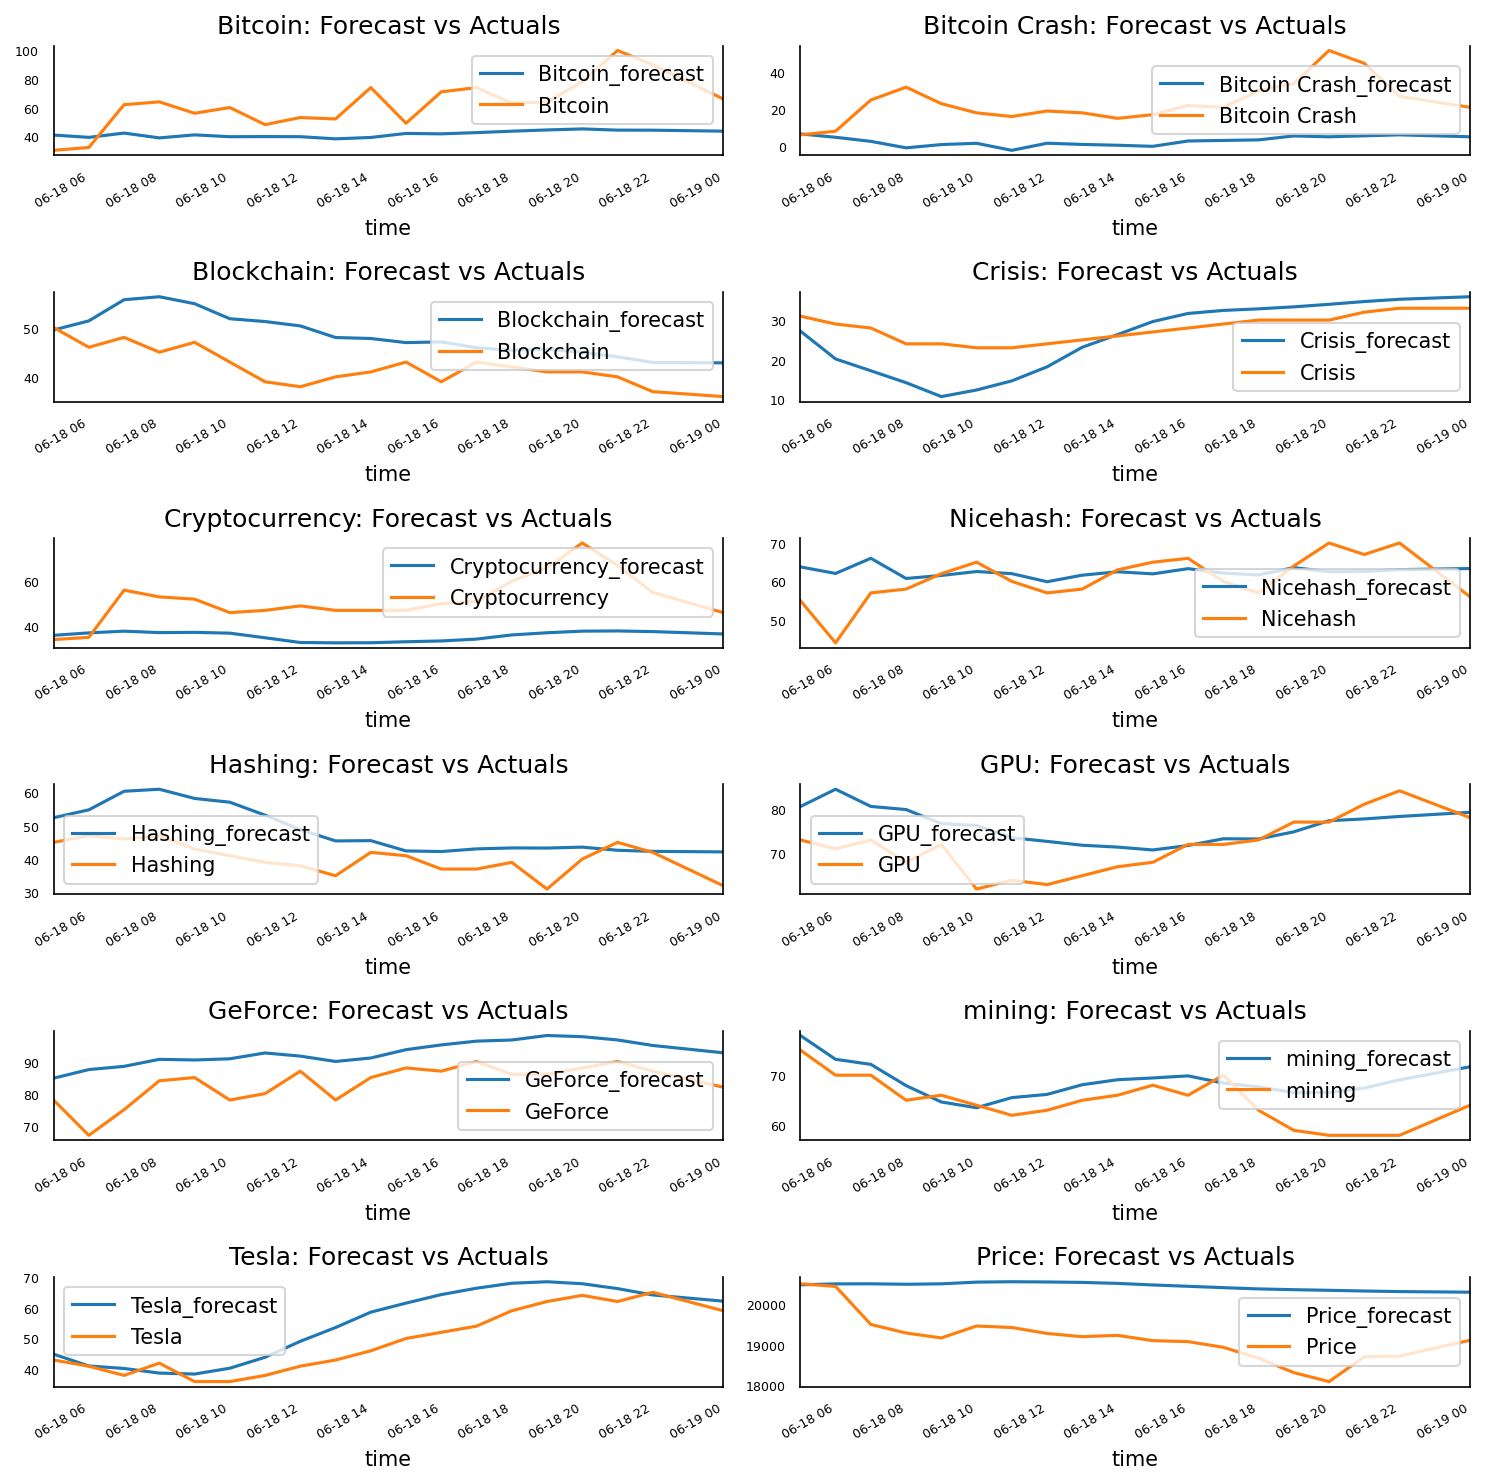

In [16]:
fig, axes = plt.subplots(nrows=int(len(df.columns)/2), ncols=2, dpi=150, figsize=(10,10))
for i, (col,ax) in enumerate(zip(df.columns, axes.flatten())):
    df_results[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_test[col][-nobs:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

# Evaluate the Forecasts

In [17]:
from statsmodels.tsa.stattools import acf
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'corr':corr, 'minmax':minmax})

In [18]:
for col in df.columns.values.tolist():
    print('\nForecast Accuracy of: ' + col)
    accuracy_prod = forecast_accuracy(df_results[col + '_forecast'].values, df_test[col])
    for k, v in accuracy_prod.items():
        print(k, ': ', round(v,4))


Forecast Accuracy of: Bitcoin
mape :  0.3428
me :  -20.9687
mae :  22.8425
mpe :  -0.2819
rmse :  26.1792
corr :  0.5888
minmax :  0.3357

Forecast Accuracy of: Bitcoin Crash
mape :  0.85
me :  -20.9897
mae :  21.044
mpe :  -0.841
rmse :  23.5648
corr :  0.2521
minmax :  0.8497

Forecast Accuracy of: Blockchain
mape :  0.1587
me :  6.4914
mae :  6.5443
mpe :  0.1577
rmse :  7.2501
corr :  0.6523
minmax :  0.133

Forecast Accuracy of: Crisis
mape :  0.2032
me :  -2.3761
mae :  5.3354
mpe :  -0.1042
rmse :  6.4582
corr :  0.8501
minmax :  0.1985

Forecast Accuracy of: Cryptocurrency
mape :  0.2996
me :  -16.1677
mae :  16.5759
mpe :  -0.2878
rmse :  18.7458
corr :  0.3994
minmax :  0.2993

Forecast Accuracy of: Nicehash
mape :  0.0837
me :  1.7372
mae :  4.7221
mpe :  0.0397
rmse :  6.2625
corr :  0.0966
minmax :  0.0735

Forecast Accuracy of: Hashing
mape :  0.2118
me :  8.1304
mae :  8.3802
mpe :  0.2062
rmse :  9.7228
corr :  0.6087
minmax :  0.1658

Forecast Accuracy of: GPU
mape : 

C:\Users\silly bb\AppData\Local\Temp\ipykernel_8700\3132832150.py:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
C:\Users\silly bb\AppData\Local\Temp\ipykernel_8700\3132832150.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  actual[:,None]]), axis=1)
